In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


# CV

In [25]:
#filename = '../Harris Corner Dectection/chessboard.jpg'
filename = '../Edge Detection/doraemon.png'

img = cv.imread(filename)

In [26]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [27]:
img_gray = np.float32(img_gray)

dst = cv.cornerHarris(img_gray, 2, 3, 0.04)

In [28]:
dst = cv.dilate(dst, None)

img[dst>0.01*dst.max()] = [0,0,255]

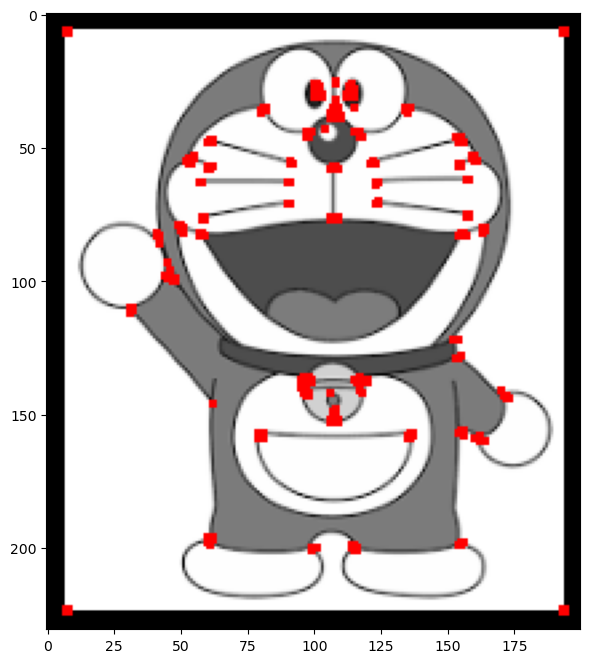

In [29]:

plt.figure(figsize=(15,8))
plt.imshow(img[:,:,::-1])
#plt.imshow(img)
plt.show()

# Kornia

In [31]:
import torch
from torchvision import transforms
import kornia.feature as kf


In [33]:
from PIL import Image

In [35]:
filename = '../Edge Detection/doraemon.png'

tensor = transforms.ToTensor()(Image.open(filename).convert('L')).unsqueeze(0)

In [36]:
print(tensor.shape)

torch.Size([1, 1, 231, 200])


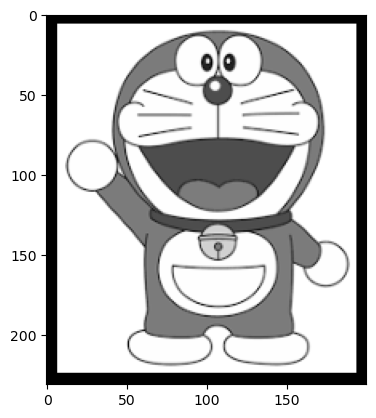

In [37]:
plt.imshow(tensor.squeeze(), 'gray')
plt.show()

In [38]:
harris = kf.responses.CornerHarris(0.05)

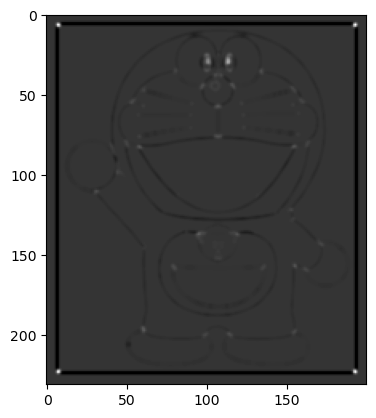

In [39]:
cornerness = harris(tensor)

plt.imshow(cornerness.squeeze(),'gray')

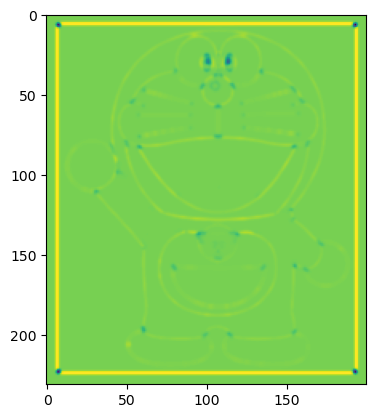

In [42]:
plt.imshow(1-cornerness.squeeze())